# Convolution Neural Network in Keras with python on a CIFAR-10 dataset

In [1]:

!pip install tensorflow
!pip install keras


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# importing the neccessary libraries and loading the cifar10 dataset
import numpy as np
import pandas as pd
from keras.datasets import cifar10
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

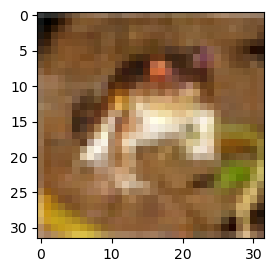

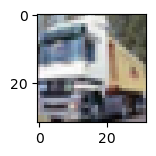

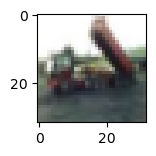

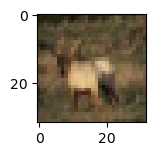

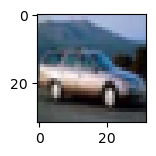

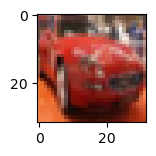

In [3]:
# plotting some images from dataset
import matplotlib.pyplot as plt
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

In [4]:
# importing the required layers to create CNN architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [5]:
# Convert the pixel values of the dataset to float type 
# normalize the dataset
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [6]:
# one hot encoding for the target classes
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

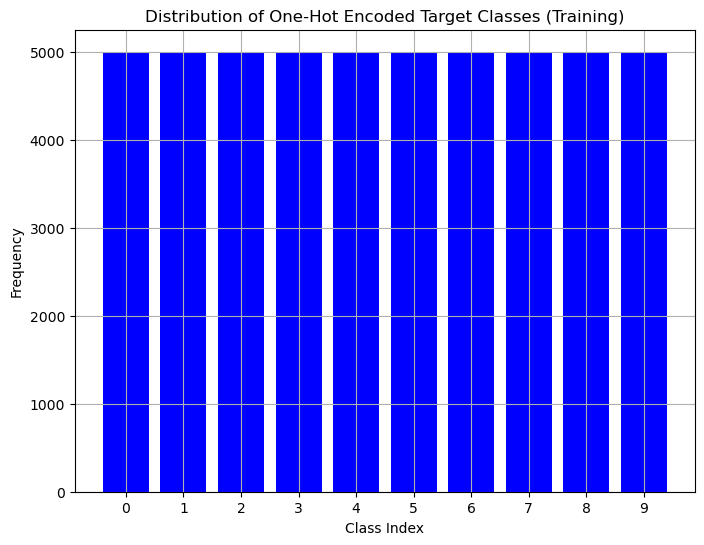

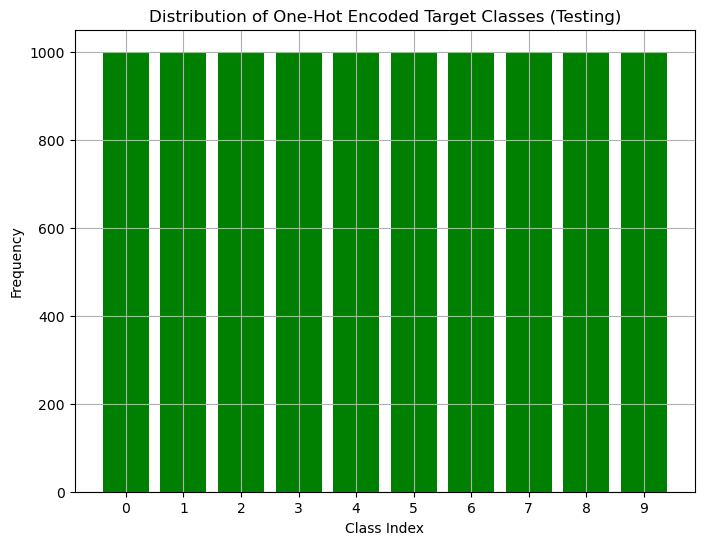

In [7]:
# Plotting train_Y
plt.figure(figsize=(8, 6))
plt.bar(range(num_classes), train_Y.sum(axis=0), color='blue')
plt.title('Distribution of One-Hot Encoded Target Classes (Training)')
plt.xlabel('Class Index')
plt.ylabel('Frequency')
plt.xticks(range(num_classes))
plt.grid(True)
plt.show()

# Plotting test_Y
plt.figure(figsize=(8, 6))
plt.bar(range(num_classes), test_Y.sum(axis=0), color='green')
plt.title('Distribution of One-Hot Encoded Target Classes (Testing)')
plt.xlabel('Class Index')
plt.ylabel('Frequency')
plt.xticks(range(num_classes))
plt.grid(True)
plt.show()


In [8]:
# Create the sequential model and add the layers
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Configure the optimizer and compile the model
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

D:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
# view the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [11]:
# train the model
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.7188 - accuracy: 0.3804 - val_loss: 1.3933 - val_accuracy: 0.4951
Epoch 2/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.3521 - accuracy: 0.5120 - val_loss: 1.2088 - val_accuracy: 0.5750
Epoch 3/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.1880 - accuracy: 0.5745 - val_loss: 1.1283 - val_accuracy: 0.5963
Epoch 4/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.0731 - accuracy: 0.6182 - val_loss: 1.0463 - val_accuracy: 0.6313
Epoch 5/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.9822 - accuracy: 0.6508 - val_loss: 1.0172 - val_accuracy: 0.6388
Epoch 6/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.8975 - accuracy: 0.6818 - val_loss: 0.9752 - val_accuracy: 0.6612
Epoch 7/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.8252 - accuracy: 0.7062 - val_loss: 0

In [12]:
# calculating the accuracy on testing data
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 4s 12ms/step - loss: 0.9217 - accuracy: 0.6878
68.77999901771545


In [13]:
# save the model
model.save("model1_cifar_10epoch.h5")

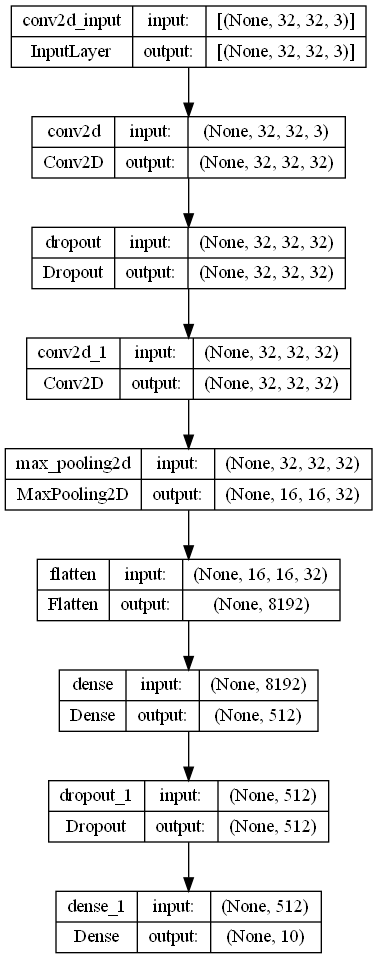

In [14]:
from keras.models import load_model
from keras.utils import plot_model

# Load the saved model
model = load_model("model1_cifar_10epoch.h5")

# Visualize the model architecture
plot_model(model, to_file='model1_cifar.png', show_shapes=True, show_layer_names=True)


In [16]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("C:/Users/Dharini/Downloads/cat.jpeg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
# Convert the image to a numpy array and normalize
im = np.array(im) / 255.0
# Reshape the image to match the input shape of the model
im = np.expand_dims(im, axis=0)
# Make predictions
predictions = model.predict(im)
pred_class_index = np.argmax(predictions[0])
# Print the predicted class
print("Predicted class:", results[pred_class_index])

1/1 [==============================] - 0s 94ms/step
Predicted class: cat


In [18]:
import ipywidgets as widgets
from IPython.display import display, Image
import numpy as np
from keras.models import load_model
from PIL import Image as PILImage
import io  # Import io module for working with byte streams

# Load the trained model
model = load_model("model1_cifar_10epoch.h5")

# Define the class labels
results = {
   0: 'aeroplane',
   1: 'automobile',
   2: 'bird',
   3: 'cat',
   4: 'deer',
   5: 'dog',
   6: 'frog',
   7: 'horse',
   8: 'ship',
   9: 'truck'
}

# Create file upload widget
uploader = widgets.FileUpload(
    accept='.jpg,.jpeg,.png',  # Accept only image files
    multiple=False  # Allow only single file upload
)

# Create output widget for displaying results
output = widgets.Output()

# Function to predict the class of the uploaded image
def predict_image(change):
    output.clear_output()
    image = PILImage.open(io.BytesIO(uploader.data[-1]))
    image = image.resize((32, 32))
    image_data = np.array(image) / 255.0
    image_data = np.expand_dims(image_data, axis=0)
    prediction_probabilities = model.predict(image_data)[0]
    predicted_class_index = np.argmax(prediction_probabilities)
    predicted_class = results[predicted_class_index]
    
    with output:
        display(image)
        print("Predicted class:", predicted_class)

# Link file upload event to predict_image function
uploader.observe(predict_image, names='data')

# Display widgets
display(uploader, output)


FileUpload(value={}, accept='.jpg,.jpeg,.png', description='Upload')

Output()

1/1 [==============================] - 0s 22ms/step


# Conclusion

* The model is correctly identifying the objects in the images, and the predicted classes match the ground truth labels.